# Classifying Vehicles by Miles Per Gallons (MPG)

- **Objectives:**
  - Classifying vehicles by Miles Per Gallon.
  - Selecting best features for Classification.
  - Evaluating the Performance of Different Models.
  - Selecting the Best Performing Model.

## Importing Libraries

In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Loading and Inspect Data

In [2]:
# Load Dataset
df_auto = pd.read_csv('./data/Auto.csv')

# Display the first few rows of the dataset
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [4]:
df_auto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


## Generate a Classification Column

In [5]:
# Add a new column mpg01 to dataframe
if not 'mpg01' in df_auto.columns:
    df_auto['mpg01'] = df_auto['mpg'].apply(
        lambda x: 1 if x > df_auto['mpg'].median() else 0
    )

print(df_auto['mpg01'].value_counts())

df_auto.info()

mpg01
0    196
1    196
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   mpg01         392 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB


## Graphically explore the Data

In [6]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

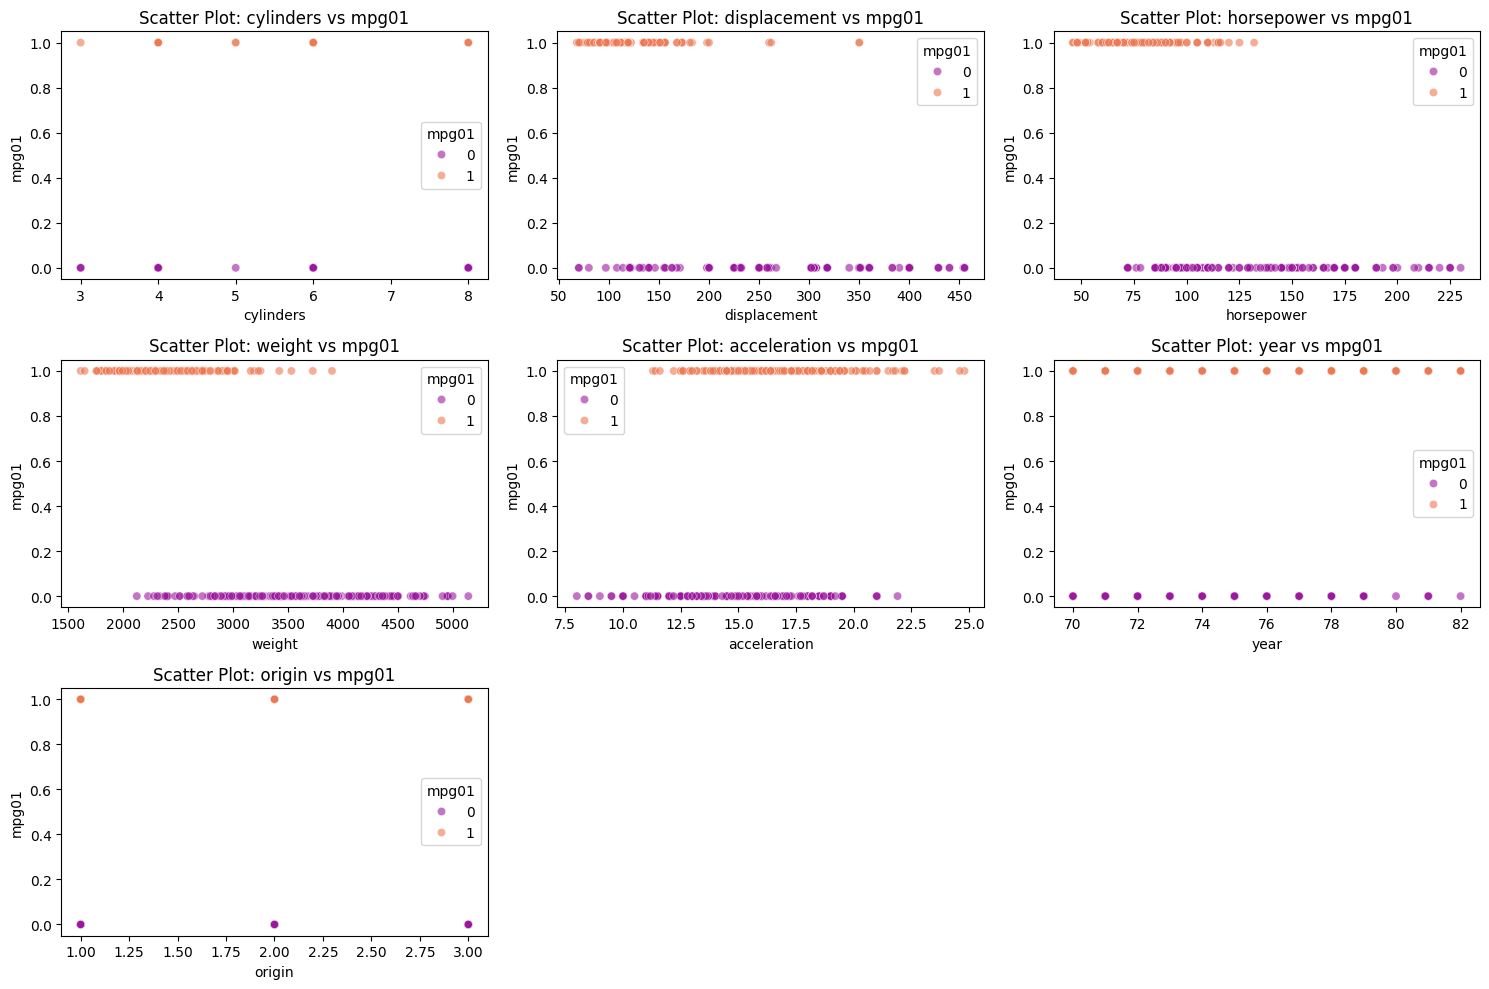

In [7]:
plt.figure(figsize=(15, 10))
for i, ftr in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_auto[ftr], y=df_auto["mpg01"], alpha=0.6, hue=df_auto['mpg01'], palette='plasma')
    plt.xlabel(ftr)
    plt.ylabel("mpg01")
    plt.title(f"Scatter Plot: {ftr} vs mpg01")

plt.tight_layout()
plt.show()

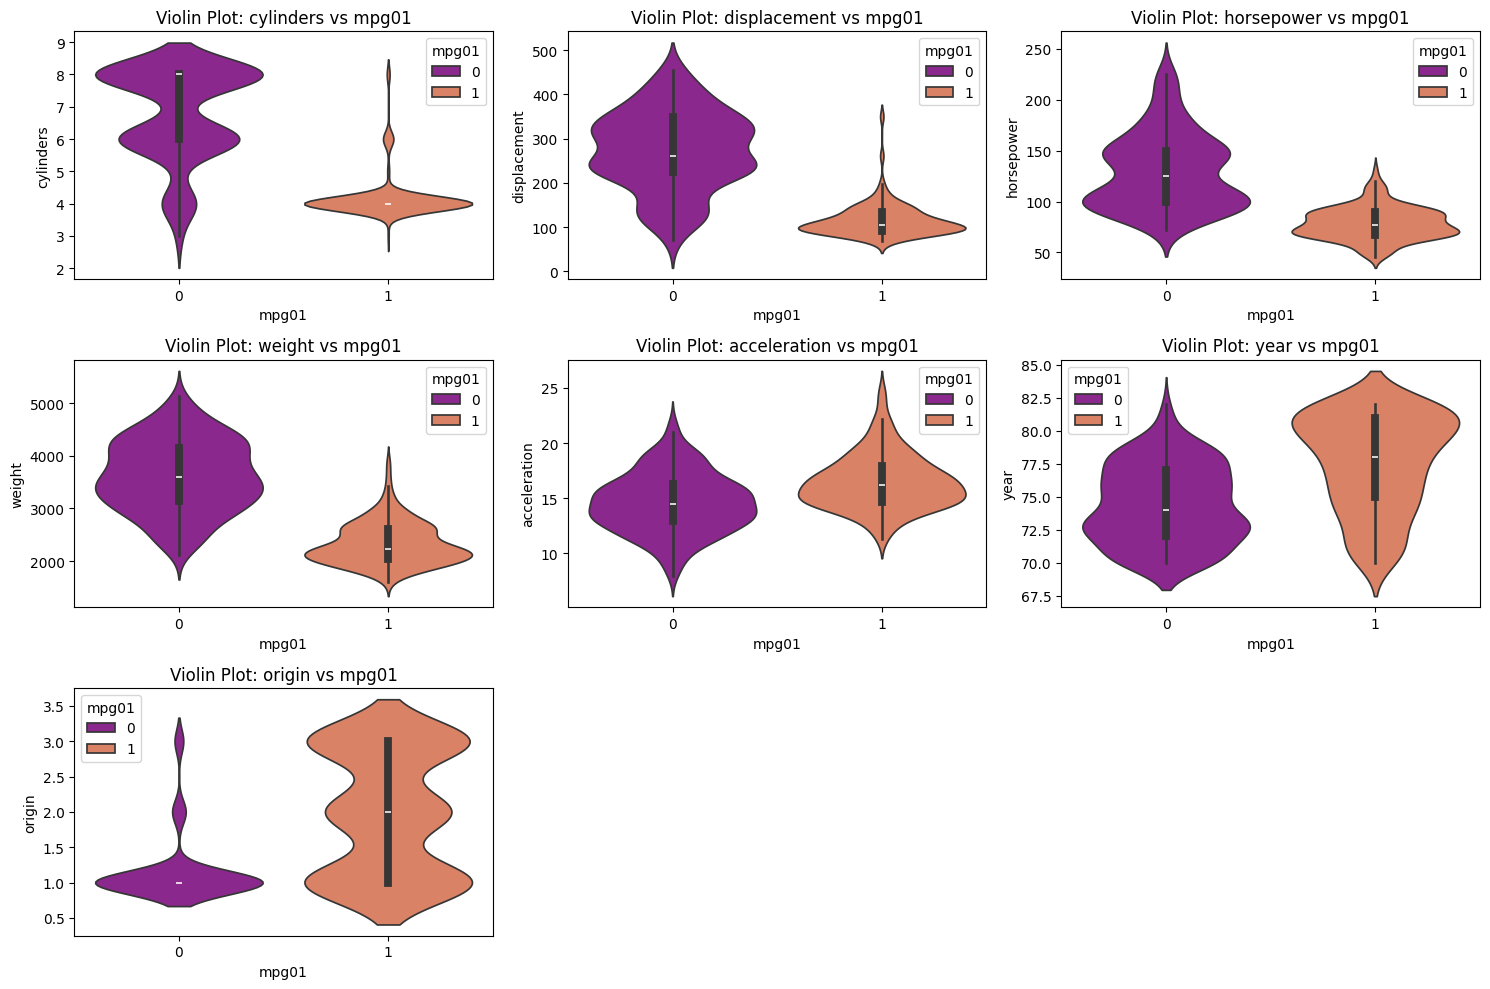

In [8]:
plt.figure(figsize=(15, 10))
for i, ftr in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df_auto["mpg01"], y=df_auto[ftr], hue=df_auto['mpg01'], palette='plasma')
    plt.title(f"Violin Plot: {ftr} vs mpg01")

plt.tight_layout()
plt.show()

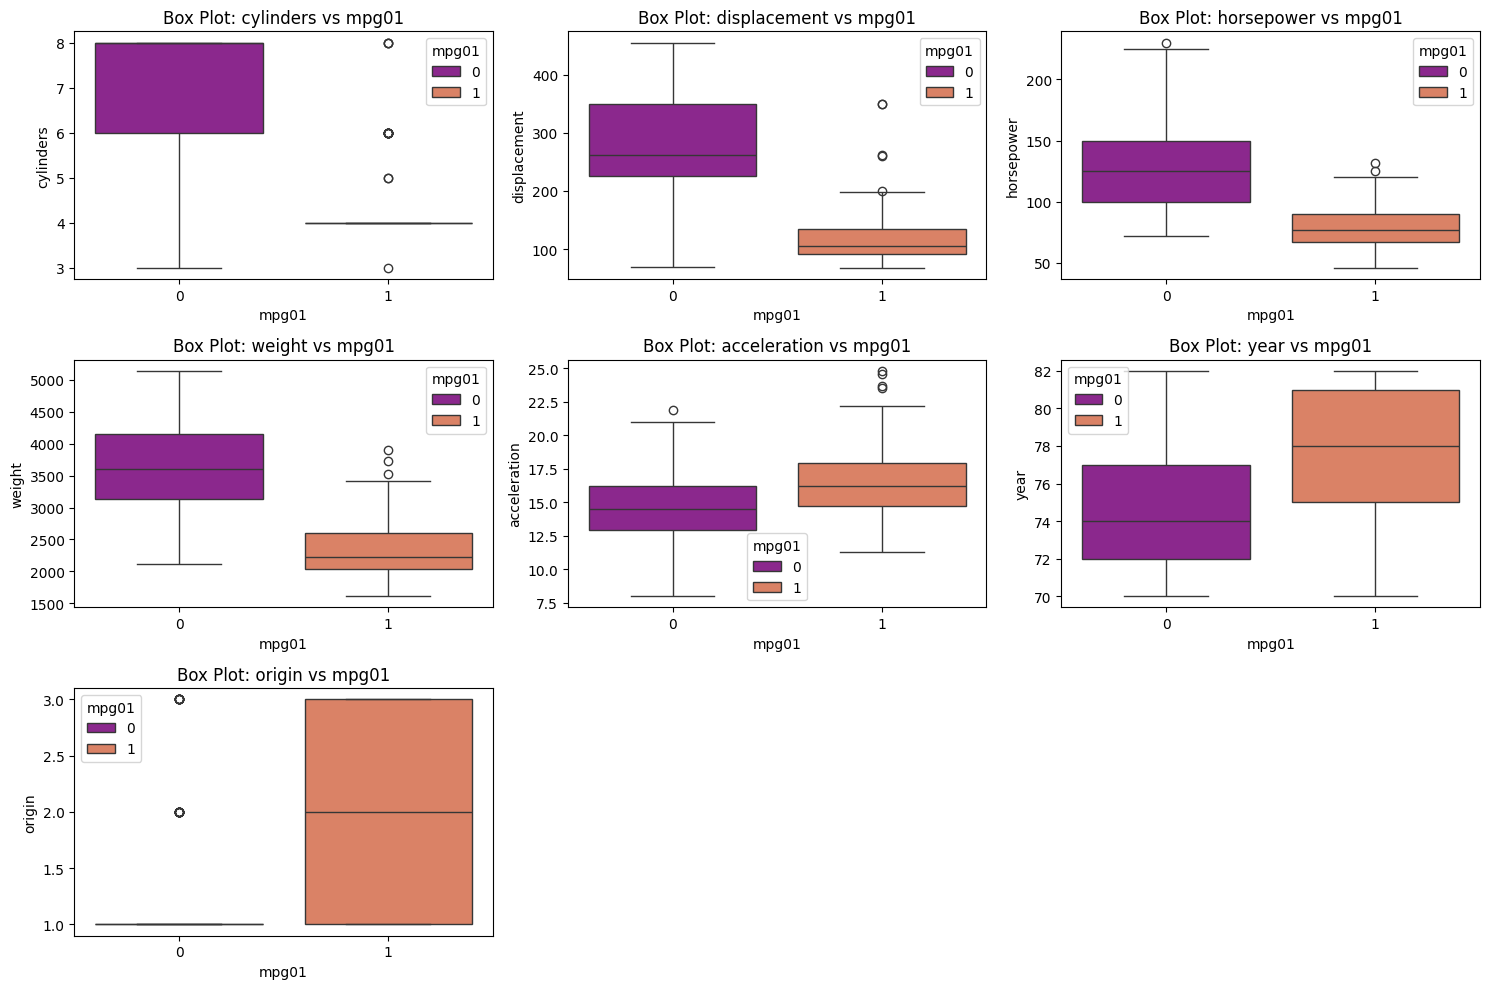

In [9]:
plt.figure(figsize=(15, 10))
for i, ftr in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_auto["mpg01"], y=df_auto[ftr], hue=df_auto['mpg01'], palette='plasma')
    plt.title(f"Box Plot: {ftr} vs mpg01")

plt.tight_layout()
plt.show()

In [10]:
# Inspect Origin 
df_auto.groupby('mpg01')['origin'].value_counts()

mpg01  origin
0      1         173
       2          14
       3           9
1      1          72
       3          70
       2          54
Name: count, dtype: int64

### Selected Features

Based on the Graphical Analysis, we found following features shows clear separations between MPG01 categories. Although some of these features have unbalanced data, we will select the following features as predictor for mpg01: 

    - Cylinders  
    - Displacement  
    - Horsepower  
    - Weight  
    - Year  
    - Origin  

## Fit different Classifying Models

### Split and Standardize the Data

In [11]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin']

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(df_auto[features]))
y = df_auto['mpg01']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((274, 6), (274,), (118, 6), (118,))

### Helping Method to Display Model Performance Metrics:

In [12]:
def evaluate_display_model(y_true, y_pred, desc, class_rpt = True):
    """
    Computes and displays classification metrics including:
    - Confusion Matrix
    - Precision
    - Recall
    - F1 Score
    - Accuracy
    - Error Rate
    - Classification Report (Conditional)
    
    Args:
    y_true (array-like): Actual class labels
    y_pred (array-like): Predicted class labels
    desc: Description to be printed as Model Stats heading
    class_rpt (bool, optional): If True (Default), displays a classification report.
    
    Returns:
    dict: A dictionary containing all computed metrics.
    """
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Extract True Positives (TP), False Positives (FP), False Negatives (FN), True Negatives (TN)
    TN, FP, FN, TP = conf_matrix.ravel()

    # Compute metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    class_report = ""
    if class_rpt:
        class_report = classification_report(y_true, y_pred, zero_division=1)

    # Print Confusion Matrix
    print(f"\n{desc} Performance:")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print(f"\nWhere:")
    print(f"TP (Actual +ve, Predicted +ve) = {TP}")
    print(f"FP (Actual -ve, Predicted +ve) = {FP}")
    print(f"FN (Actual +ve, Predicted -ve) = {FN}")
    print(f"TN (Actual -ve, Predicted -ve) = {TN}")

    # Print Other Metrics
    print(f"\nOther Metrics:")
    print(f"Precision (TP / (TP + FP)): {precision:.4f}")
    print(f"Recall (TP / (TP + FN)): {recall:.4f}")
    print(f"F1 Score (2 * (Precision * Recall) / (Precision + Recall)): {f1score:.4f}")
    print(f"Accuracy ((TP + TN) / (TP + TN + FP + FN)): {accuracy:.4f}")
    print(f"Error Rate (1 - Accuracy): {error_rate:.4f}")
    if class_rpt:
        print(f"\nClassification Report:\n{class_report}")

    # Return all metrics in a dictionary (useful for further analysis)
    return {
        "Confusion Matrix": conf_matrix,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1score,
        "Accuracy": accuracy,
        "Error Rate": error_rate,
        "Classification Report": class_report
    }

### First, Perfrom Linear Discriminant Analysis (LDA).

In [13]:
# Fit model
lda_mpg_model = LinearDiscriminantAnalysis()
lda_mpg_model = lda_mpg_model.fit(X_train, y_train)

priors = lda_mpg_model.priors_ 
mean = lda_mpg_model.means_

priors, mean

(array([0.47810219, 0.52189781]),
 array([[ 0.67739568,  0.65182348,  0.56286   ,  0.68009237, -0.38038214,
         -0.45095665],
        [-0.77370738, -0.7662375 , -0.66417728, -0.7861751 ,  0.39520544,
          0.50030495]]))

In [14]:
# Make predictions
y_pred_mpg_lda = lda_mpg_model.predict(X_test)

In [15]:
# Evaluate and display metrics using the previously defined function
metrics_mpg_lda = evaluate_display_model(y_test, y_pred_mpg_lda, "LDA Model (MPG Predictor)")


LDA Model (MPG Predictor) Performance:

Confusion Matrix:
[[59  6]
 [ 3 50]]

Where:
TP (Actual +ve, Predicted +ve) = 50
FP (Actual -ve, Predicted +ve) = 6
FN (Actual +ve, Predicted -ve) = 3
TN (Actual -ve, Predicted -ve) = 59

Other Metrics:
Precision (TP / (TP + FP)): 0.8929
Recall (TP / (TP + FN)): 0.9434
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.9174
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.9237
Error Rate (1 - Accuracy): 0.0763

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        65
           1       0.89      0.94      0.92        53

    accuracy                           0.92       118
   macro avg       0.92      0.93      0.92       118
weighted avg       0.93      0.92      0.92       118



- Error Rate is 7.63%. It is quite low, reinforcing model reliability.
- Accuracy of 92.37% indicates the model is performing very well.
- High Recall (91%, 94%) suggests it is excellent at identifying both high and low mpg01 categories.
- Slight Bias: The model is slightly better at predicting mpg01=0 (low MPG cars). 

### Second, Perform Quadratic Discriminant Analysis (QDA)

In [16]:
# Fit model
qda_mpg_model = QuadraticDiscriminantAnalysis()
qda_mpg_model = qda_mpg_model.fit(X_train, y_train)

priors = qda_mpg_model.priors_ 
mean = qda_mpg_model.means_

priors, mean

(array([0.47810219, 0.52189781]),
 array([[ 0.67739568,  0.65182348,  0.56286   ,  0.68009237, -0.38038214,
         -0.45095665],
        [-0.77370738, -0.7662375 , -0.66417728, -0.7861751 ,  0.39520544,
          0.50030495]]))

In [17]:
# Make predictions
y_pred_mpg_qda = qda_mpg_model.predict(X_test)

In [18]:
# Evaluate and display metrics using the previously defined function
metrics_mpg_lda = evaluate_display_model(y_test, y_pred_mpg_qda, "QDA Model (MPG Predictor)")


QDA Model (MPG Predictor) Performance:

Confusion Matrix:
[[60  5]
 [ 8 45]]

Where:
TP (Actual +ve, Predicted +ve) = 45
FP (Actual -ve, Predicted +ve) = 5
FN (Actual +ve, Predicted -ve) = 8
TN (Actual -ve, Predicted -ve) = 60

Other Metrics:
Precision (TP / (TP + FP)): 0.9000
Recall (TP / (TP + FN)): 0.8491
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.8738
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.8898
Error Rate (1 - Accuracy): 0.1102

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.90      0.85      0.87        53

    accuracy                           0.89       118
   macro avg       0.89      0.89      0.89       118
weighted avg       0.89      0.89      0.89       118



- Error Rate is 11.02%. It is Higher Than LDA’s (7.63%). This indicates that QDA is not performing as well for this dataset.
- Accuracy 88.98%: Slightly lower than LDA’s 92.37%, suggesting that LDA performed better in this case.
- Recall for mpg01=1 (High MPG Cars) is Lower (85%): The model misclassified 8 high-MPG cars as low-MPG. This means QDA is slightly weaker at correctly identifying high MPG cars.
- Precision is good (90%): When QDA predicts a high MPG (mpg01=1), it is correct 90% of the time.

### Third, Perform K-Nearest Neighbour (KNN)

In [19]:
# Create the KNN model with K=10.
knn_model = KNeighborsClassifier(n_neighbors=10)
# Fit the model
knn_model = knn_model.fit(X_train, y_train)

In [20]:
# Make prediction on Training Data
y_train_pred_knn = knn_model.predict(X_train)

In [21]:
# Evaluate and display metrics using the previously defined function
metrics_knn = evaluate_display_model(y_train, y_train_pred_knn, "KNN K=10 Model")


KNN K=10 Model Performance:

Confusion Matrix:
[[121  10]
 [ 11 132]]

Where:
TP (Actual +ve, Predicted +ve) = 132
FP (Actual -ve, Predicted +ve) = 10
FN (Actual +ve, Predicted -ve) = 11
TN (Actual -ve, Predicted -ve) = 121

Other Metrics:
Precision (TP / (TP + FP)): 0.9296
Recall (TP / (TP + FN)): 0.9231
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.9263
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.9234
Error Rate (1 - Accuracy): 0.0766

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       131
           1       0.93      0.92      0.93       143

    accuracy                           0.92       274
   macro avg       0.92      0.92      0.92       274
weighted avg       0.92      0.92      0.92       274



- Error Rate is (7.66%).
- Accuracy (92.34%) is slightly lower than LogisticRegression.
- Precision is goog for both mpg categories (92%, 93%)
- Recall is also strong (92.31%), meaning the model makes few false predictions.

### Fourth, Perform Logistic Regression

In [22]:
lr_mpg_model = LogisticRegression(random_state=4)
lr_mpg_model = lr_mpg_model.fit(X_train, y_train)

coef = lr_mpg_model.coef_[0]  # Coefficients for features
intercept = lr_mpg_model.intercept_[0]  # Intercept

coef, intercept

(array([-0.53593502, -0.57970447, -0.97133202, -2.27412202,  1.10715859,
         0.03166131]),
 np.float64(-1.0300790964917486))

- Year has the highest positive coefficient, newer cars tend to have higher MPG (mpg01=1).
- Weight has the strongest negative coefficient, heavier cars are less fuel-efficient (mpg01=0)

In [23]:
# Make predictions
y_pred_mpg_lr = lr_mpg_model.predict(X_test)

In [24]:
# Evaluate and display metrics using the previously defined function
metrics_mpg_lr = evaluate_display_model(y_test, y_pred_mpg_lr, "LogisticRegression Model (MPG Predictor)")


LogisticRegression Model (MPG Predictor) Performance:

Confusion Matrix:
[[60  5]
 [ 3 50]]

Where:
TP (Actual +ve, Predicted +ve) = 50
FP (Actual -ve, Predicted +ve) = 5
FN (Actual +ve, Predicted -ve) = 3
TN (Actual -ve, Predicted -ve) = 60

Other Metrics:
Precision (TP / (TP + FP)): 0.9091
Recall (TP / (TP + FN)): 0.9434
F1 Score (2 * (Precision * Recall) / (Precision + Recall)): 0.9259
Accuracy ((TP + TN) / (TP + TN + FP + FN)): 0.9322
Error Rate (1 - Accuracy): 0.0678

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.91      0.94      0.93        53

    accuracy                           0.93       118
   macro avg       0.93      0.93      0.93       118
weighted avg       0.93      0.93      0.93       118



- Error Rate is (6.78%). This is the lowest so far, suggesting Logistic Regression is a strong choice for this problem.
- Accuracy (93.22%) is slightly better than QDA (88.98%) and LDA (92.37%).
- Precision for both mpg classess are good (95%, 91%)
- Recall (92%, 94%) are high, meaning the model makes fewer false predictions. 

## Conclusion:

Based on the Lowest Error Rate of 6.78% with High Accuracy, Precision and Recall, Logistic Regression is the best model for this Data.